## 8. Equação de Laplace com condições de Neumann

Como sabemos, o método de diferenças finitas é uma abordagem numérica que aproxima as derivadas de uma equação diferencial parcial através de diferenças entre os valores discretos das variáveis ao longo de uma malha.

Dentre as equações diferenciais parciais elípticas em duas variáveis, um exemplo clássico é a equação de Poisson:

$$\nabla^2 u(x, y) \equiv \frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=f(x, y)$$

Se o termo fonte $f(x,y)$ for nulo, tem-se a equação de Laplace

$$\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=0$$

Essas equações aparecem em inúmeros contextos, por exemplo, em problemas envolvendo temperatura em uma placa (condução de calor estacionária), potencial elétrico, fluxo de fluidos incompressíveis, deformação de membranas elásticas, etc.

A fórmula de diferenças finitas para aproximar numericamente a derivada de segunda ordem da função $u(x, y)$ na direção $x$ é:

$$ \frac{\partial^2 u}{\partial x^2} \approx \frac{u(x + h_x, y) - 2u(x, y) + u(x - h_x, y)}{h_x^2} $$

onde $h_x$ é o tamanho do passo na direção $x$ na malha discreta. Essa fórmula estima a derivada de segunda ordem utilizando os valores discretos da função $u$ em três pontos adjacentes na direção $x$. Na direção $y$ a fórmula é análoga. 

$$ \frac{\partial^2 u}{\partial y^2} \approx \frac{u(x, y + h_y) - 2u(x, y) + u(x - h, y+h_y)}{h_y^2} $$


A utilização destas fórmulas nos permite expressar uma equação diferencial em termos de equações algébricas, por exemplo, substituindo na equação de Poisson, tem-se para cada ponto $\left(x_i, y_j\right)$ da malha uma equação como

$$
\frac{u_{i-1,j}-2 u_{i,j}+u_{i+1,j}}{h_x^2}+
\frac{u_{i,j-1}-2 u_{i,j}+u_{i,j+1}}{h_y^2}
\approx
f_{i,j}
$$

Desprezando o erro, multiplicando a equação por $h_x^2$ e rearranjando os termos, obtemos a equação de diferenças finitas, em que $w$ é a aproximação para $u$, expressa como:


$$(u_{i-1,j}+u_{i+1,j})-2
u_{i,j} \left[\left(  \frac{h_x}{h_y}\right)^2+1\right]+ \left( \frac{h_x}{h_y}\right)^2(u_{i,j-1}+u_{i,j+1}) = h_x^2 f_{i,j}$$

Usando condições de contorno nos pontos da fronteira da malha obtemos um sistema linear $(n-1)(m-1) \times(n-1)$ $(m-1)$ com as incógnitas sendo as aproximações para $u_{i, j}$ nos pontos interiores da malha.

### Condições de contorno na derivada
[Chapra e Canale](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/772)

A condição de contorno em que a derivada é dada é conhecida como condição de contorno de Neumann. Para o problema da placa aquecida, isso quer dizer especificar o fluxo de calor em vez da temperatura na borda. Um exemplo é a situação na qual a borda é isolada, nesse caso a derivada é nula. 

A figura a seguir descreve um nó $(0, j)$ na aresta esquerda da placa aquecida. Apli-cando-se a equação de diferenças a esse ponto, obtemos$$T_{1, j}+T_{-1, j}+T_{0, j+1}+T_{0, j-1}-4 T_{0, j}=0$$

Observe que um ponto imaginário $(-1, j)$, localizado fora da placa, é necessário nessa equação. Embora esse ponto exterior fictício possa parecer representar um problema, na realidade serve como veículo para incorporar a condição de contorno na derivada ao problema. Isso é feito representando-se a primeira derivada na dimensão $x$ em $(0, j)$ por uma diferença dividida finita
$$
\frac{\partial T}{\partial x} \cong \frac{T_{1, j}-T_{-1, j}}{2 \Delta x}

que pode ser reescrita como
$$

**Exemplo 1: (A equação de diferença de Laplace e condições de contorno de Neumann)**
Considere uma placa aquecida, como é mostrada na figura abaixo, **mas com a aresta inferior isolada**.

(Fonte: [Chapra, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/769)). 

<img src="https://github.com/tiagoburiol/MatComp_IV/blob/main/imagens/exemplo_laplace.png?raw=true" width="240">

A equação geral para caracterizar a derivada na aresta inferior (isto é, em $j=$ 0) da placa aquecida é

$$
T_{i+1,0}+T_{i-1,0}+2 T_{i, 1}-2 \Delta y \frac{\partial T}{\partial y}-4 T_{i, 0}=0
$$


Para uma aresta isolada, a derivada é nula, e a equação se torna

$$
T_{i+1,0}+T_{i-1,0}+2 T_{i, 1}-4 T_{i, 0}=0
$$


As equações simultâneas para a distribuição de temperaturas na placa com a aresta inferior isolada podem ser escritas na forma matricial como

$$
\left[\begin{array}{cccccccccccc}
4 & -1 & & -2 & & & & & & & & \\
-1 & 4 & -1 & & -2 & & & & & & & \\
& -1 & 4 & & & -2 & & & & & & \\
-1 & & & 4 & -1 & & -1 & & & & & \\
& -1 & & -1 & 4 & -1 & & -1 & & & & \\
& & -1 & & -1 & 4 & & & -1 & & & \\
& & & -1 & & & 4 & -1 & & -1 & & \\
& & & & -1 & & -1 & 4 & -1 & & -1 & \\
& & & & & -1 & & -1 & 4 & & & -1 \\
& & & & & & -1 & & & 4 & -1 & \\
& & & & & & & -1 & & -1 & 4 & -1 \\
& & & & & & & & -1 & & -1 & 4
\end{array}\right]\left\{\begin{array}{c}
T_{10} \\T_{20} \\T_{30} \\T_{11} \\T_{21} \\T_{31} \\
T_{12} \\T_{22} \\T_{32} \\T_{13} \\T_{23} \\T_{33}
\end{array}\right\}=\left\{\begin{array}{c}
75 \\0 \\50 \\75 \\0 \\50 \\75 \\0 \\
50 \\175 \\100 \\150
\end{array}\right\}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([[4,-1,0,-2,0,0,0,0,0,0,0,0],
             [-1,4,-1,0,-2,0,0,0,0,0,0,0],
             [0,-1,4,0,0,-2,0,0,0,0,0,0],
             [-1,0,0,4,-1,0,-1,0,0,0,0,0],
             [0,-1,0,-1,4,-1,0,-1,0,0,0,0],
             [0,0,-1,0,-1,4,0,0,-1,0,0,0],
             [0,0,0,-1,0,0,4,-1,0,-1,0,0],
             [0,0,0,0,-1,0,-1,4,-1,0,-1,0],
             [0,0,0,0,0,-1,0,-1,4,0,0,-1],
             [0,0,0,0,0,0,-1,0,0,4,-1,0],
             [0,0,0,0,0,0,0,-1,0,-1,4,-1],
             [0,0,0,0,0,0,0,0,-1,0,-1,4]], dtype=float)
b = np.array([75,0,50,75,0,50,75,0,50,175,100,150], dtype=float)

In [3]:
b = np.array([75,0,50,75,0,50,75,0,50,175,100,150], dtype=float)

In [4]:
T_int = np.linalg.solve(A,b)
T_int = T_int.reshape(4,3)

print(T_int)

[[71.90735532 67.0145435  59.5362213 ]
 [72.8074389  68.30729868 60.56517085]
 [76.01510158 72.84204148 64.41716344]
 [83.41092595 82.62860221 74.26144141]]


In [5]:
x_mesh, y_mesh = np.meshgrid(np.linspace(0,4,5+1),
                             np.linspace(0,4,5+1))
T = np.zeros((5,5))
T[-1,:]=100
T[:,0]=75
T[:,-1]=50
T

array([[ 75.,   0.,   0.,   0.,  50.],
       [ 75.,   0.,   0.,   0.,  50.],
       [ 75.,   0.,   0.,   0.,  50.],
       [ 75.,   0.,   0.,   0.,  50.],
       [ 75., 100., 100., 100.,  50.]])

In [6]:
T[0:-1,1:-1]=T_int

In [7]:
np.flipud(np.round(T,2))

array([[ 75.  , 100.  , 100.  , 100.  ,  50.  ],
       [ 75.  ,  83.41,  82.63,  74.26,  50.  ],
       [ 75.  ,  76.02,  72.84,  64.42,  50.  ],
       [ 75.  ,  72.81,  68.31,  60.57,  50.  ],
       [ 75.  ,  71.91,  67.01,  59.54,  50.  ]])

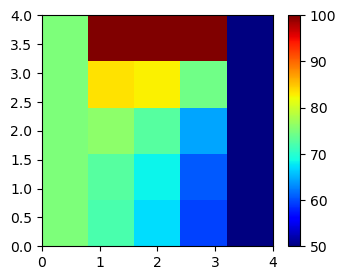

In [8]:
fig, ax = plt.subplots(figsize=(4, 3))
plt.pcolormesh(x_mesh, y_mesh, T, cmap='jet', shading='flat') 
plt.gca().set_aspect('equal')

plt.colorbar()
plt.show()


**Um código para montar o sistema para quaisquer nx e ny**

In [9]:
Lx=4; Ly=4
nx=40; ny=40

In [10]:
hx = Lx/nx
hy = Ly/ny

N = (nx-1) * (ny) 

In [11]:
nos = np.flipud(np.arange(N).T.reshape(ny,nx-1))
print(nos)

[[1521 1522 1523 ... 1557 1558 1559]
 [1482 1483 1484 ... 1518 1519 1520]
 [1443 1444 1445 ... 1479 1480 1481]
 ...
 [  78   79   80 ...  114  115  116]
 [  39   40   41 ...   75   76   77]
 [   0    1    2 ...   36   37   38]]


In [12]:
# devolve o numero do no em função da posicao (i,j)
def idx(i, j): 
    return np.flipud(nos).T[i,j]

In [13]:
# verificando o sentido de i e j e nos
#for j in range(0,ny):
#    for i in range(0,nx-1):
#        print('Nó: (i,j)->(',i,',',j,')->',idx(i,j))

In [14]:
# Montagem do sistema
ax = -1.0/hx**2
ay = -1.0/hy**2
ac = -2.0*(ax + ay)

A = np.zeros((N, N), dtype=float)
b = np.zeros(N, dtype=float)

for j in range(0, ny):  
    for i in range(0, nx-1):   
        k = idx(i, j)
        A[k, k] = ac #coeficiente do nó central

        if i > 0:
            A[k, idx(i-1, j)] = ax
        else:
            b[k] -= ax * 75

        if i < nx-2:
            A[k, idx(i+1, j)] = ax
        else:
            b[k] -= ax * 50

        if j > 0: 
            A[k, idx(i, j-1)] = ay
        else:
            A[k, idx(i, j+1)] += ay 

        if j < ny-1:
            A[k, idx(i, j+1)] += ay 
        else:
            b[k] -= ay *100

In [15]:
#print(A)

In [16]:
#print(b)

In [17]:
T_int = np.linalg.solve(A,b)
T_int = T_int.reshape(ny,nx-1)
#print(T_int)

In [18]:
#T_int.shape

In [19]:
T = np.zeros((ny+1,nx+1))
#T.shape

In [20]:
x_mesh, y_mesh = np.meshgrid(np.linspace(0,4,nx+2),
                             np.linspace(0,4,ny+2))
T = np.zeros((ny+1,nx+1))
T[-1,:]=100
T[:,0]=75
T[:,-1]=50

T[0:-1,1:-1]=T_int

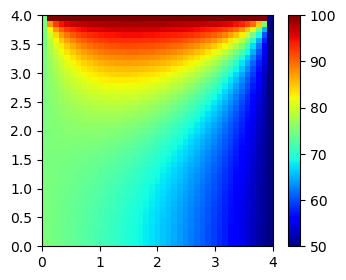

In [21]:
fig, ax = plt.subplots(figsize=(4, 3))
plt.pcolormesh(x_mesh, y_mesh, T, cmap='jet', shading='flat') 
plt.gca().set_aspect('equal')

plt.colorbar()
plt.show()

### Atividades:

**1.** ([Boyce e Diprima, 2024](https://app.minhabiblioteca.com.br/reader/books/9788521638841/epubcfi/6/44%5B%3Bvnd.vst.idref%3Dchapter10%5D!/4/1150/100/3:66%5Best%2Co.%5D)) Sabendo que a solução $u(x, y)$ da equação de Laplace no retângulo $0<x<a, 0<y<b$, que satisfaz as condições de contorno

$$
\begin{array}{lll}
u(0, y)=0, & u(a, y)=f(y), & 0<y<b \\
u(x, 0)=0, & u_y(x, b)=0, & 0<x<a .
\end{array}
$$

é dada por

$$
u(x, y)=\sum_{n=l}^{\infty} c_n \operatorname{senh}\left(\frac{(2 n-1) \pi x}{2 b}\right) \operatorname{sen}\left(\frac{(2 n-1) \pi y}{2 b}\right)$$

com

$$c_n=\frac{2 / b}{\operatorname{senh}((2 n-1) \pi a / 2 b)} \int_0^b f(y) \operatorname{sen}\left(\frac{(2 n-1) \pi y}{2 b}\right) dy$$

Verifique, usando SymPy, que para $f(y)=y(2 b-y)$, tem-se

$$c_n=\frac{32 b^2}{(2 n-1)^3 \pi^3 \operatorname{senh}((2 n-1) \pi a / 2 b)}$$

Então, obtenha uma solução numérica para o caso de $a=3$ e $b=2$ e compare os gráficos da solução numérica e da solução exta.


**2.** ([Boyce e Diprima, 2024](https://app.minhabiblioteca.com.br/reader/books/9788521638841/epubcfi/6/44%5B%3Bvnd.vst.idref%3Dchapter10%5D!/4/1150/100/3:66%5Best%2Co.%5D)) Sabendo que a solução $u(x, y)$ da equação de Laplace no retângulo $0<x<a, 0<y<b$, que satisfaz as condições de contorno

$$
\begin{array}{lll}
u_x(0, y)=0, & u_x(a, y)=0, & 0<y<b \\
u(x, 0)=0, & u(x, b)=g(x), & 0<x<a
\end{array}
$$

é dada por

$$u(x, y)=\frac{c_0 y}{2}+\sum_{n=1}^{\infty} c_n \cos \left(\frac{n \pi x}{a}\right) \operatorname{senh}\left(\frac{n \pi y}{a}\right)$$

com

$$c_0=\frac{2}{a b} \int_0^a g(x) d x$$

$$c_n=\frac{2 / a}{\operatorname{senh}(n \pi b / a)} \int_0^a g(x) \cos \left(\frac{n \pi x}{a}\right) d x$$

Verifique, usando SymPy, que para $g(x)=1+x^2(x-a)^2$, tem-se

$$c_0=\frac{2}{b}\left(1+\frac{a^4}{30}\right)$$

$$c_n=-\frac{24 a^4(1+\cos (n \pi))}{n^4 \pi^4 \operatorname{senh}(n \pi b / a)}$$

Então, obtenha uma solução numérica para o caso de $a=3$ e $b=2$ e compare os gráficos da solução numérica e da solução exta